In [1]:
# Import necessary dependencies
from pfu_transit.mask_generation import  generate_star, generate_exoplanet
from pfu_transit.photometry_simulation import photometric_observation
# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
print("Imports loaded")

'''
# UNICORN TRANSIT STUFF
framew = 2500
frameh = 2500

unicorn_npz = np.load("assets/unicorn/unicorn_boolean_mask.npz")
unicorn = ~unicorn_npz["arr_0"]
unicorn[unicorn > 0] = 1
unicorn = unicorn[1:, 1:]
unicorn = unicorn.reshape((np.shape(unicorn)[0] // 2, 2,  np.shape(unicorn)[1] // 2, 2)).sum(3).sum(1)
unicorn = unicorn[1:, 1:]

exoplanet_mask = np.pad(unicorn, ((int((framew - np.shape(unicorn)[0])/2), int((framew - np.shape(unicorn)[0])/2)),\
                   (int((frameh - np.shape(unicorn)[1])/2), int((frameh - np.shape(unicorn)[1])/2))), mode="constant", constant_values=0)
'''


# NORMAL TRANSIT
exoplanet_mask = generate_exoplanet(wavelength=0.5)

# STAR
star_mask = generate_star(wavelength=0.5, stellar_flux=0.3, stellar_temperature=4800, stellar_oblateness = 0)

np.savez("transit_masks", exoplanet_mask, star_mask)

Imports loaded
Convolving mask....
Obtaining atmosphere...


100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [00:12<00:00,  6.46it/s]


Creating mask...


100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [00:01<00:00, 71.58it/s]


Calculating limb darkening coefficients....


100%|████████████████████████████████████████████████████████████████████████████| 1663/1663 [00:01<00:00, 1331.64it/s]


Creating mask...


100%|█████████████████████████████████████████████████████████████████████████████| 1663/1663 [00:12<00:00, 130.70it/s]


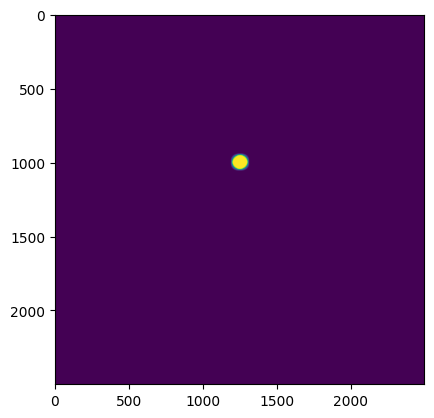

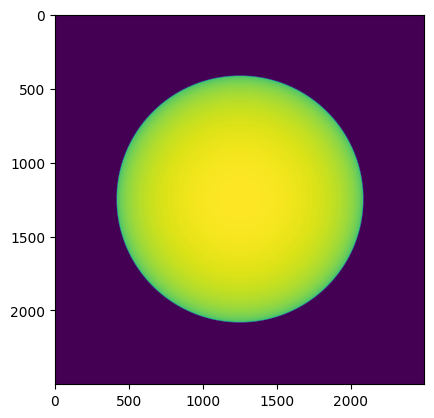

In [2]:
masks = np.load("transit_masks.npz")
exoplanet_mask = masks["arr_0"]
star_mask = masks["arr_1"]

plt.imshow(exoplanet_mask)
plt.show()

plt.imshow(star_mask)
plt.show()

In [3]:
image_directory = r"C:\Users\mmc\Music\exoplanet_images"

times, flux = photometric_observation(star_mask, exoplanet_mask, step=1)

100%|██████████████████████████████████████████████████████████████████████████████| 2373/2373 [00:48<00:00, 49.39it/s]


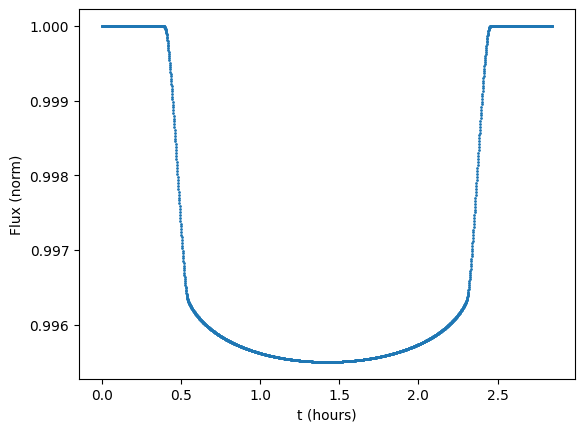

In [6]:
plt.scatter(times, flux/flux[0], s=1)
plt.ylabel("Flux (norm)")
plt.xlabel("t (hours)")
#plt.xlim(0.4, 0.5)
#plt.ylim(0.999, 1.0025)
plt.show()